In [1]:
# importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)

# Question 1

In [2]:
# reading data into a dataframe
df = pd.read_csv('classification.csv')

In [3]:
# analyzing data
df.describe()

age    interest     success
count  297.000000  297.000000  297.000000
mean    23.709718   46.986527    0.569024
std      8.864000   21.956447    0.496049
min      2.347560   -0.852800    0.000000
25%     17.002148   28.689067    0.000000
50%     23.283644   45.695926    1.000000
75%     30.661149   65.171876    1.000000
max     45.773729   97.175508    1.000000

In [4]:
# getting shape of dataset
df.shape

(297, 3)

In [5]:
# getting positive and negative instances
df_pos = df[df['success'] == 1]
df_neg = df[df['success'] == 0]

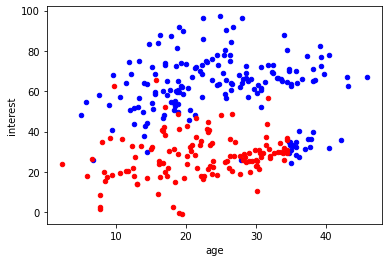

In [6]:
# plotting data
def plot_data():
    ax = df_pos.plot(kind='scatter', x='age', y='interest', color='blue')
    df_neg.plot(kind='scatter', x='age', y='interest', color='red', ax=ax)

def plot_data_3d(ax):
    ax.scatter(df_pos['age'], df_pos['interest'], df_pos['success'], color = 'blue')
    ax.scatter(df_neg['age'], df_neg['interest'], df_neg['success'], color = 'red')

plot_data()

In [7]:
# obtain label and feature matrix

# add bias term
X = df[['age', 'interest']]
X['bias'] = 1

# get numpy arrays
X = X.to_numpy()
Y = df[['success']].to_numpy()

In [8]:
# get misclassified

def misclassified(y, Y):
    return np.sum(np.abs((1*(y > 0.5))-Y))/len(Y)

Misclassified: 0.12457912457912458


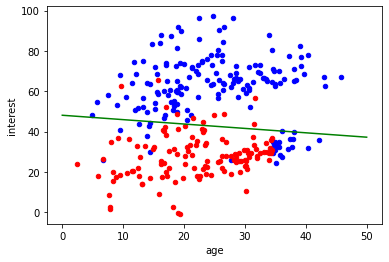

In [9]:
# least squares method

def ls_fit(X, Y):
    # we use normal equation for least squares method
    w = (np.linalg.pinv(X.T @ X)) @ (X.T @ Y)
    return w

def plot_line(w):
    # if f(x) = w1.x1 + w2.x2 + w3
    # f(x) = 0.5 should be the line dividing
    # the dataset into two classes
    
    # age value is less than 50 for
    # every row
    x = np.linspace(0, 50, 1000)
    y = (0.5 - w[2] - w[0] * x) / w[1]
    plt.plot(x, y, 'green')

# obtain weights
w = ls_fit(X, Y)

# plot
plot_data()
plot_line(w)

# misclassified
print(f'Misclassified: {misclassified(X@w, Y)}')

In [10]:
# logistic regression using stochastic gradient descent

step_size = 1e-3
num_iterations = 2000
WATCH_CONVERGENCE = False

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def h(x, w):
    # computes what is passed to sigmoid
    ans = x @ w
    return ans

def lr_fit(X, Y, step_size = 1e-3, num_iterations = 2000, WATCH_CONVERGENCE = False):
    # initializing weights in [-0.1, 0.1]
    w = (np.random.rand(X.shape[1]) - 0.5) / 5
    
    # gradient descent
    for _ in range(num_iterations):
        for i in range(X.shape[0]):
            w = w + step_size * (Y[i] - sigmoid(h(X[i], w))) * X[i]
        
        if (_% 50 == 0 and WATCH_CONVERGENCE):
            print(w)
    
    return w

# obtain weights
w = lr_fit(X, Y, step_size, num_iterations, WATCH_CONVERGENCE)

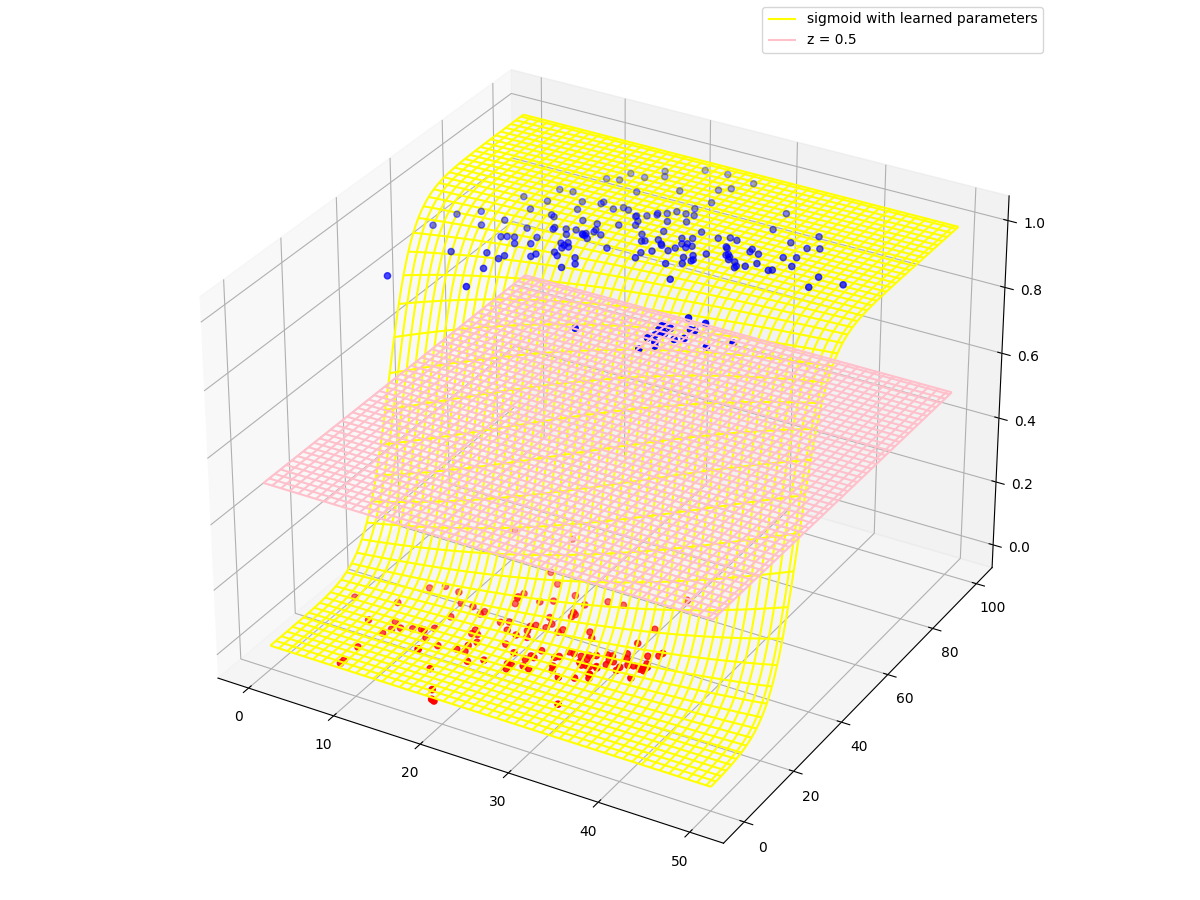

In [11]:
%matplotlib widget

# 3d plot of learnt sigmoid

def sigmoid_from_coordinates(x, y):
    return sigmoid(h(np.array([x, y, 1], dtype=object), w))

def plane(x, y):
    return (x+y)*0 + 0.5

def plot_sigmoid(ax, w):
    x = np.outer(np.linspace(0, 50, 100), np.ones(100))
    y = np.outer(np.linspace(0, 100, 100), np.ones(100)).T
    
    z = sigmoid_from_coordinates(x, y)
    ax.plot_wireframe(x, y, z, color = 'yellow', label = 'sigmoid with learned parameters')
    
    z = plane(x, y)
    ax.plot_wireframe(x, y, z, color = 'pink', label = 'z = 0.5')
    
    ax.legend()

# plot
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
plot_data_3d(ax)
plot_sigmoid(ax, w)

Misclassified: 0.12457912457912458


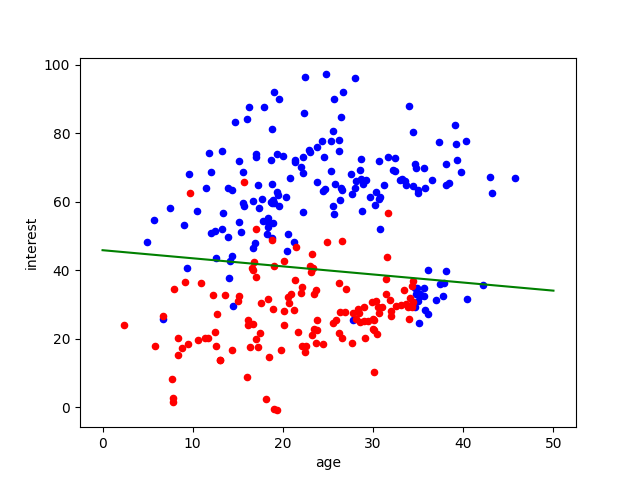

In [12]:
# plotting decision boundary for learnt sigmoid

def plot_sigmoid_boundary(w):
    # if h(x) = w1.x1 + w2.x2 + w3
    # h(x) = 0 should be the line dividing
    # the dataset into two classes
    # because sigmoid(h(x)) = 0.5 only for h(x) = 0
    
    # age value is less than 50 for
    # every row
    x = np.linspace(0, 50, 1000)
    y = (- w[2] - w[0] * x) / w[1]
    plt.plot(x, y, 'green')

plot_data()
plot_sigmoid_boundary(w)

# misclassified
print(f'Misclassified: {misclassified(sigmoid(h(X, w).reshape(len(Y), -1)), Y)}')

In [13]:
# higher dimensions
df_2 = df[['age', 'interest']]

df_2['age^2'] = df_2['age'] ** 2
df_2['interest^2'] = df_2['interest'] ** 2

df_2['age*interest'] = df_2['age'] * df_2['interest']

df_2['bias'] = 1

In [14]:
# normalize to avoid overflows
factors = df_2.max().to_numpy()
df_2_normalized = df_2 / df_2.max()

In [15]:
# design matrix for two dimensions
X_normalized = df_2_normalized.to_numpy()
X = df_2.to_numpy()

In [16]:
# linear regression
w_normalized = lr_fit(X_normalized, Y, 1, 4000, False)

In [17]:
# scale down w to accomodate initial normalization
w = w_normalized / factors

Misclassified: 0.08080808080808081


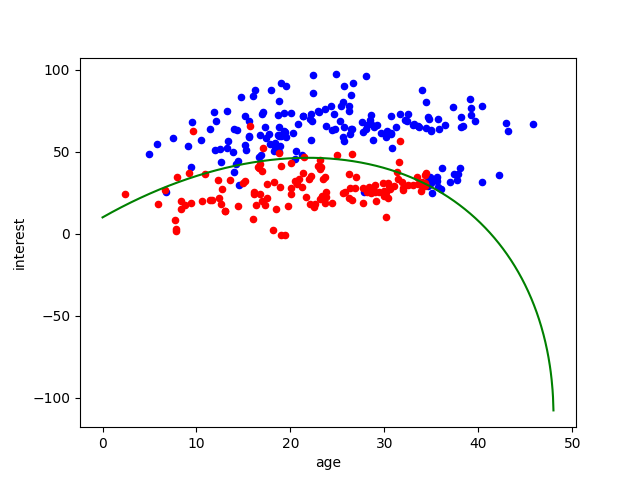

In [18]:
# plotting decision boundary for learnt sigmoid

def plot_sigmoid2_boundary(w):
    # if h(x) = w1.x1 + w2.x2 + w3
    # h(x) = 0 should be the line dividing
    # the dataset into two classes
    # because sigmoid(h(x)) = 0.5 only for h(x) = 0
    
    # age value is less than 48 for
    # every row
    x = np.linspace(0, 48, 1000)
    D = (w[1] + w[4]*x)**2 -4*w[3]*(w[0]*x + w[2]*(x**2) + w[5])
    y1 = (-w[1] - w[4] * x + (D**0.5)) / (2*w[3])
    
    plt.plot(x, y1, 'green')

plot_data()
plot_sigmoid2_boundary(w)

# misclassifications
print(f'Misclassified: {misclassified(sigmoid((X@w).reshape(len(Y), -1)), Y)}')

In [19]:
%reset -f

# Question 2

In [20]:
# importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from heapq import heapify, heappush, heappop

np.random.seed(0)

In [21]:
# reading data into dataframe
df = pd.read_csv('adult.data', header=None, sep=', ', engine='python')

# giving column labels
headings = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
            'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
            'income']
df.columns = headings

In [22]:
df

age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0              2174             0              40  United-States  <=50K  
1                 0             0              13  United-States  <=50K  
2                 0             0              40  United-States  <=50K  
3                 0             0              40  United-States  <=50K  
4                 0             0              40           Cuba  <=50K  
...             ...           ...             ...            ...    ...  
32556             0             0              38  United-States  <=50K  
32557             0             0              40  United-States   >50K  
32558             0             0              40  United-States  <=50K  
32559             0             0              20  United-States  <=50K  
32560         15024             0              40  United-States   >50K  

[32561 rows x 15 columns]

In [23]:
class Criteria:
    def __init__(self, is_discrete, value, is_greater):
        # is_greater is defined only for continuous else None
        self.__is_discrete = is_discrete
        self.__value = value
        self.__is_greater = is_greater
    
    def __call__(self, x):
        if (self.__is_discrete):
            return x == self.__value
        elif (self.__is_greater):
            return x > self.__value
        else:
            return x <= self.__value

    def __repr__(self):
        if (self.__is_discrete):
            return f'x={self.__value}'
        elif (self.__is_greater):
            return f'x>{self.__value}'
        else:
            return f'x<={self.__value}'

In [24]:
class Node:
    def __init__(self, df, level, criteria):
        self.df = df
        self.level = level
        self.children = []
        self.criteria = criteria # criteria (type Criteria) which tells if given value of attribute is satisfied
        self.attribute = None # attribute on which this node is further divided, none implies leaf node
        
    def get_criteria(self, dtree):
        # dtree is the reference to the tree of which this node is a part of
        
        # check if no need to split
        if (len(set(self.df[dtree.label])) == 1): return None, None, None, True
        
        
        best_attribute = None
        best_gain = float('-inf')
        best_split = None
        # iterate over each attribute to find information gain
        
        for attr in self.df:
            if (attr == dtree.label or len(set(self.df[attr])) == 1):
                continue
            if (dtree.attribute_types[attr] == 'discrete'):
                gain = self.__discrete_gain(attr, dtree.label)
                if (gain > best_gain):
                    best_gain = gain
                    best_attribute = attr
                    best_split = None
            else:
                gain, split = self.__continuous_gain(attr, dtree.label)
                if (gain > best_gain):
                    best_gain = gain
                    best_attribute = attr
                    best_split = split
        
        return best_attribute, best_split, best_gain, False
    
    def __discrete_gain(self, attribute, label):
        
        gain = Node.entropy(self.df, label)
        
        for val in set(self.df[attribute]):
            df_val = self.df[self.df[attribute] == val]
            gain -= (Node.entropy(df_val, label) * (df_val.shape[0] / self.df.shape[0]))
            
        return gain
    
    def __continuous_gain(self, attribute, label):
        n = self.df.shape[0]
        df_as_list = [(self.df[attribute][i], self.df[label][i]) for i in self.df.index]
        df_as_list.sort()
        df_less, df_more = {}, {}
        num_less, num_more = 0, n
        
        for a, l in df_as_list:
            try:
                df_more[l] += 1
            except:
                df_more[l] = 1
                
        full_entropy = Node.entropy_from_dict(df_more, n)
        
        best_split_value = None
        best_gain_value = float('-inf')
        
        for i in range(n-1):
            a, l = df_as_list[i]
            
            df_more[l] -= 1
            num_more -= 1
            if (df_more[l] == 0):
                del df_more[l]
            
            try:
                df_less[l] += 1
            except:
                df_less[l] = 1
            num_less += 1

            if (df_as_list[i][0] == df_as_list[i+1][0]):
                continue
            
            gain = full_entropy
            
            # less than or equal to
            gain -= Node.entropy_from_dict(df_less, num_less) * (num_less / n)
            
            # greater than
            gain -= Node.entropy_from_dict(df_more, num_more) * (num_more / n)
            
            split_value = (df_as_list[i][0] + df_as_list[i+1][0]) / 2
            
            if (gain > best_gain_value):
                best_split_value = split_value
                best_gain_value = gain
            
        return best_gain_value, best_split_value

    @staticmethod
    def entropy_from_dict(d: dict, s: int):
        # s is the sum of values from key-value pair of d
        e = 0
        for val in d:
            i = d[val]
            e -= (i/s)*np.log2(i/s)
        return e

    @staticmethod
    def entropy(df, label):
        '''
        l is the list of count for
        different keys
        '''
        s = df.shape[0]
        e = 0
        for val in set(df[label]):
            i = (list(df[label] == val)).count(True)
            e -= (i/s)*np.log2(i/s)
        return e
    
    def print_node(self, label):
        print('\t'*self.level, self.criteria, sep='')
        if (self.children):
            print('\t'*self.level, f'({self.attribute})', sep='', end=' ')
        else:
            l = list(self.df[label]) # list of labels in dataframe of node
            x = max(l, key = l.count)
            print('\t'*self.level, f'{x} {l.count(x)/len(l)}', sep = '', end='')
        print()
        for child in self.children:
            child.print_node(label)
    
    def num_mismatches(self, label):
        poss = set(self.df[label])
        ans = float('inf')
        for val in poss:
            ans = min(ans, self.df[self.df[label] == val].shape[0])
        return ans

In [25]:
class DecisionTree:
    def __init__(self, df, label, attribute_types, num_levels = float('inf')):
        self.label = label # header for the label attribute
        self.attribute_types = attribute_types # dictionary telling type (discrete/continuous) for each attribute
        
        self.root = Node(df, 0, Criteria(lambda: True, None, None))
        self.num_nodes = 1
        self.height = num_levels
        
        split_attribute, split_value, split_gain, is_leaf = self.root.get_criteria(self)
        
        # leaves is a priority queue storing the leaf nodes with atleast 1 mismatch
        self.leaves = [(-split_gain, split_attribute, split_value, is_leaf, self.num_nodes, self.root)]
        heapify(self.leaves)

        self.has_warned = False
        
    def build_tree(self):
        if (not self.leaves):
            if (not self.has_warned):
                print('No more splits required')
                self.has_warned = True
            return
        split_gain, split_attribute, split_value, is_leaf, _, node = heappop(self.leaves)
        split_gain *= -1
        self.__build_tree(split_gain, split_attribute, split_value, is_leaf, node)
    
    def predict(self, features):
        current_node = self.root
        
        while (current_node.children):
            valid = False
            for child in current_node.children:
                if (child.criteria(features[current_node.attribute])):
                    current_node = child
                    valid = True
                    break
            if (valid == False):
                raise ValueError('Illegal Value for given data')
        
        l = list(current_node.df[self.label]) # list of labels in dataframe of current_node
        return max(l, key = l.count) # return most likely label
    
    def train_error(self):
        mismatches = 0
        for x in self.leaves:
            mismatches += x[5].num_mismatches(self.label)
        return mismatches/self.root.df.shape[0]
        
    def __build_tree(self, split_gain, split_attribute, split_value, is_leaf, node):
        # returns the list of children for given node
        
        #TODO: base case
        if (node.level == self.height): return # leaf node
        
        if (is_leaf): return # no need to split further
        
        node.attribute = split_attribute
        
        if (self.attribute_types[split_attribute] == 'discrete'):
            df = node.df
            node.children = [Node(
                                df[df[split_attribute] == val][df.columns.drop(split_attribute)],
                                node.level + 1,
                                Criteria(True, val, None)
                                 ) 
                             for val in set(node.df[split_attribute])
                            ]
        
        else:
            df = node.df
            node.children = [Node(
                                df[df[split_attribute] <= split_value], 
                                node.level + 1, 
                                Criteria(False, split_value, False)
                                 ),
                             Node(
                                 df[df[split_attribute] > split_value], 
                                 node.level + 1, 
                                 Criteria(False, split_value, True)
                                  )
                            ]
            
        for child in node.children:
            split_attribute, split_value, split_gain, is_leaf = child.get_criteria(self)
            # is_leaf is true if this node cannot be further split
            # split_value is returned only if split_attribute is continuous otherwise None
            
            if (is_leaf):
                continue
            
            self.num_nodes += 1
                
            heappush(self.leaves, (-split_gain, split_attribute, split_value, is_leaf, self.num_nodes, child))
            
    def print_tree(self):
        print('root')
        if (self.root.children):
            print(f'({self.root.attribute})')
        for child in self.root.children:
            child.print_node(self.label)

In [26]:
# splitting dataset into training and testing set

mask = np.random.rand(len(df)) < 0.8

df_train = df[mask]
df_test = df[~mask]

In [27]:
# training

attribute_types = {
    "age": "continuous",
    "workclass": "discrete",
    "fnlwgt": "continuous",
    "education": "discrete",
    "education-num": "continuous",
    "marital-status": "discrete",
    "occupation": "discrete",
    "relationship": "discrete",
    "race": "discrete",
    "sex": "discrete",
    "capital-gain": "continuous",
    "capital-loss": "continuous",
    "hours-per-week": "continuous",
    "native-country": "discrete"
}

height = 5

dtree = DecisionTree(df_train,
                    "income",
                    attribute_types,
                    height)

In [28]:
num_splits = 100

for i in range(num_splits):
    dtree.build_tree()

In [29]:
dtree.print_tree()

root
(relationship)
	x=Wife
	(occupation) 
		x=?
		(education) 
			x=10th
			<=50K 1.0
			x=Preschool
			<=50K 1.0
			x=5th-6th
			<=50K 1.0
			x=Assoc-voc
			(fnlwgt) 
				x<=121155.5
				<=50K 1.0
				x>121155.5
				(fnlwgt) 
					x<=194589.0
					>50K 1.0
					x>194589.0
					<=50K 1.0
			x=Masters
			(age) 
				x<=43.5
				>50K 1.0
				x>43.5
				(fnlwgt) 
					x<=103101.0
					>50K 1.0
					x>103101.0
					<=50K 1.0
			x=Prof-school
			<=50K 1.0
			x=7th-8th
			<=50K 1.0
			x=Assoc-acdm
			(age) 
				x<=57.5
				<=50K 1.0
				x>57.5
				>50K 1.0
			x=11th
			<=50K 1.0
			x=Some-college
			(age) 
				x<=26.5
				<=50K 1.0
				x>26.5
				(age) 
					x<=28.5
					>50K 1.0
					x>28.5
					<=50K 0.7058823529411765
			x=HS-grad
			(hours-per-week) 
				x<=32.5
				(hours-per-week) 
					x<=3.0
					>50K 0.5
					x>3.0
					<=50K 1.0
				x>32.5
				(age) 
					x<=36.5
					<=50K 0.875
					x>36.5
					>50K 0.8
			x=9th
			<=50K 1.0
			x=12th
			<=50K 1.0
			x=Bachelors
			(native-countr

In [30]:
dtree.train_error()

0.17056612457809145

In [31]:
dtree.num_nodes

123